# Installation

When using the mrsimulator on Google colab, type the following in the first cell.

In [1]:
!pip install mrsimulator

# Workflow in setting up a simulation

- Create spin systems
- Select methods
- Run simulations

All simulations are setup using the `Simulator` class.

In [2]:
from mrsimulator import Simulator

In [3]:
sim = Simulator()

The two main attributes of this class are the `spin_systems` and `methods` attribute

#### Step 1: Create Spin systems
``sim.spin_systems = []``

#### Step 2: Create methods
``sim.methods = []``

#### Step 3: Run the simulation
``sim.run()``

# How to setup a spin system?

A spin system is a collection of `sites` and `couplings` that describes the sample in-whole or in-parts and represents an isolated system in the context of magnetic resonance.

### Create sites

A Site is generically described with the following parameters.

- **isotope**: The site isotope, e.g., '1H', '14N', '17O'.

- **isotropic_chemical_shift** The isotropic chemical shift in ppm.

- **shielding_symmetric**: Describes the traceless symmetric part of shielding tensor with parameters described using Haeberlen notation.
  - **zeta**: The anisotropy in ppm.
  - **eta**: The asymmetry parameter.

- **quadrupolar**: Describes the traceless quadrupolar tensor with parameters
  - **Cq**: The quadrupolar coupling constant in Hz.
  - **eta**: The quadrupolar asymmetry parameter.
  - **alpha**: The Euler angle in radians.
  - **beta**: The Euler angle in radians.
  - **gamma**: The Euler angle in radians. 

- **name**: An optional name.
- **label**: An optional label.
- **description**: An optional description.



Use the `Site` class to create sites

In [5]:
from mrsimulator import Site

In [6]:
site1 = Site(
    isotope='13C',
    isotropic_chemical_shift=10
)

In [7]:
site1.to_dict_with_units()

{'isotope': '13C', 'isotropic_chemical_shift': '10.0 ppm'}

In [8]:
site2 = Site(
    isotope='13C', 
    isotropic_chemical_shift=-10, 
    shielding_symmetric={'zeta': 100, 'eta':0.1}
)

site2.to_dict_with_units()

{'isotope': '13C',
 'isotropic_chemical_shift': '-10.0 ppm',
 'shielding_symmetric': {'zeta': '100.0 ppm', 'eta': 0.1}}

### Create spin systems

A `SpinSystem` is generically described with the following parameters.

- **sites**: A list of `Site` objects.

- **abundance** The spin system abundance.

- **name**: An optional name.
- **label**: An optional label.
- **description**: An optional description.

Use the `SpinSystem` class to create spin system(s) from sites.

In [9]:
from mrsimulator import SpinSystem

In [41]:
sys1 = SpinSystem(
    name='sys1',
    sites=[site1],
    abundance=0.1
)

sys2 = SpinSystem(
    name='sys2',
    sites=[site2],
    abundance=1
)

In [63]:
sys2.to_dict_with_units()

{'name': 'sys2',
 'sites': [{'isotope': '13C',
   'isotropic_chemical_shift': '-10.0 ppm',
   'shielding_symmetric': {'zeta': '100.0 ppm', 'eta': 0.1}}],
 'abundance': '1.0 %'}

#### Add spin systems to the simulator object.

In [42]:
sim.spin_systems = [sys1, sys2]

# How to setup a method?

A method is a collection of parameters that describe an NMR method.

In [43]:
from mrsimulator.methods import BlochDecaySpectrum

In [44]:
method1 = BlochDecaySpectrum(
    channels=['13C'],
    magnetic_flux_density=9.4, # T
    rotor_angle=90 * 3.1415 / 180, # rad
    rotor_frequency=3000, # in Hz
    spectral_dimensions=[
        {
            'count': 512,
            'spectral_width': 40000, # in Hz
            'label': '13C resonances'
        }
    ]
)

#### Add method to the simulator object.

In [45]:
sim.methods = [method1]

# Run the simulation

In [46]:
sim.run()

In [47]:
data = sim.methods[0].simulation

# Serializing data object

The simulation data is a core scientific dataset model[1] (CSDM) object. It is a lightweight and portable file format model for multi-dimensional scientific datasets and is supported by numerous NMR software—DMFIT, SIMPSON, jsNMR, and RMN. We also provide a python package csdmpy.

For more details, see [CSDM serialization](https://csdmpy.readthedocs.io/en/stable/startFromScratch/save_dataset.html).

In [48]:
data.save('test_sim.csdf')

# Plot of the data

In [49]:
import matplotlib.pyplot as plt

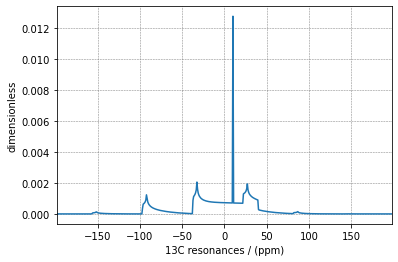

In [53]:
ax = plt.gca(projection='csdm')
ax.plot(data)
plt.savefig('filename.pdf')
plt.show()

# Configuring simulator object

For details, see [ConfigSimulator](https://mrsimulator.readthedocs.io/en/stable/configuring_simulator.html).

In [57]:
sim.config

ConfigSimulator(number_of_sidebands=64, integration_volume='octant', integration_density=70, decompose_spectrum='none')

In [64]:
sim.config.decompose_spectrum = 'spin_system'
sim.run()
data = sim.methods[0].simulation

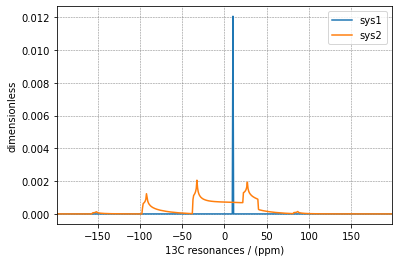

In [65]:
ax = plt.gca(projection='csdm')
ax.plot(data)
plt.savefig('filename.pdf')
plt.show()

# Reference
1. Srivastava, D. J., Vosegaard, T., Massiot, D., Grandinetti, P. J. Core Scientific Dataset Model: A lightweight and portable model and file format for multi-dimensional scientific data. PLOS ONE, 2020, 15, 1. [DOI 10.1371/e0225953](https://doi.org/10.1371/journal.pone.0225953)